In [1]:
# solving racetrack using reinforcement learning
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define the racetrack
# 0: empty
# 1: obstacle
# 2: start
# 3: finish
racetrack_map = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  ], dtype=np.int32)

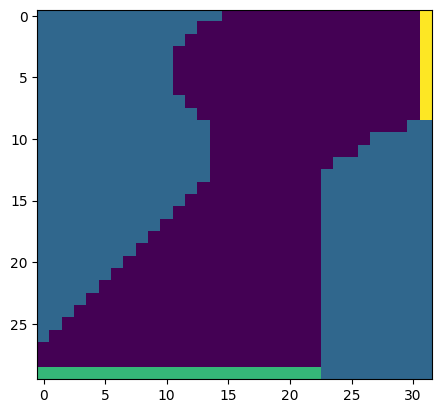

In [3]:
# plot the racetrack
plt.imshow(racetrack_map)
plt.show()

In [4]:
start_array = np.argwhere(racetrack_map == 2)
print([start_array[np.random.randint(0, len(start_array))],0,0])
action_space = np.array([
            [-1, -1], [-1, 0], [-1, 1],
            [0, -1], [0, 0], [0, 1],
            [1, -1], [1, 0], [1, 1]
        ])
print(action_space[1])
# np.random.randint(0, 9, size=(32, 32, 5, 9))

[array([29, 21]), 0, 0]
[-1  0]


In [28]:
class Racetrack:
    def __init__(self, racetrack_map, start_num):
        self.racetrack_map = racetrack_map
        self.height = racetrack_map.shape[0]
        self.width = racetrack_map.shape[1]
        self.start_array = np.argwhere(racetrack_map == 2)
        self.finish_array = np.argwhere(racetrack_map == 3)
        self.start_num = start_num
        # start position is random zero velocity
        self.start = [self.start_array[self.start_num][0],
                      self.start_array[self.start_num][1], 0, 0]
        # finish position is fixed
        self.position = self.start
        self.action_space = np.array([
            [-1, -1], [-1, 0], [-1, 1],
            [0, -1], [0, 0], [0, 1],
            [1, -1], [1, 0], [1, 1]
        ])
        self.reward = 0
        self.visited_cells = []
        # random policy x y dx dy 32 * 32 * 5 * 9
        self.policy = np.random.randint(0, 9, size=(self.height, self.width, 5, 9))
        # Q table x y dx dy 32 * 32 * 5 * 9 * num of actions
        self.Q = np.zeros((self.height, self.width, 5, 9, len(self.action_space)))
        self.is_done = False
        self.epsilon = 0.1
        self.gamma = 0.99

    def reset(self):
        self.start = [self.start_array[self.start_num][0],
                      self.start_array[self.start_num][1], 0, 0]
        self.is_done = False

    def get_action(self, state):
        # soft policy greedy
        if np.random.random() > self.epsilon:
            return self.action_space[self.policy[state[0], state[1], state[2], state[3]]]
        else:
            return self.action_space[np.random.randint(0, len(self.action_space))]

    def step(self, action):
        # update position
        self.position[0] += self.position[2]
        self.position[1] += self.position[3]
        self.position[2] += action[0]
        self.position[3] += action[1]
        # check if the car is out of the racetrack
        # check velocity valid
        if self.position[2] < -4:
            self.position[2] = -4
        elif self.position[2] > 0:
            self.position[2] = 0
        if self.position[3] < -4:
            self.position[3] = -4
        elif self.position[3] > 4:
            self.position[3] = 4
        # all speed are zero
        if self.position[2] == 0 and self.position[3] == 0:
            self.position[2] = -1


        if self.position[0] < 0:
            self.position[0] = 0
            self.position[2] = 0
        if self.position[0] >= self.height:
            self.position[0] = self.height - 1
            self.position[2] = 0
        if self.position[1] < 0:
            self.position[3] = 0
            self.position[1] = 0
        if self.position[1] >= self.width:
            self.position[3] = 0
            self.position[1] = self.width - 1

        if self.position[2] == 0 and self.position[3] == 0 and self.position[0] == 0:
            self.position[3] = 1
        # check if the car hits the obstacle
        if self.racetrack_map[self.position[0], self.position[1]] == 1:
            self.reset()
            self.reward = -5
        # check if the car reaches the finish line
        elif self.racetrack_map[self.position[0], self.position[1]] == 3:
            self.reward = 50
            self.is_done = True

        else:
            self.reward = -1

        return self.position, self.reward

    def render(self):
        racetrack_map = self.racetrack_map.copy()
        racetrack_map[self.position[0], self.position[1]] = 4
        plt.imshow(racetrack_map)
        plt.show()

    def get_state(self):
        return self.position

    def get_reward(self):
        return self.reward

    # update Q
    def update_Q(self, state, action, reward, alpha, gamma):
        # get the index of the action
        for i in range(len(self.action_space)):
            if np.sum(self.action_space[i] == action) == 2:
                action_index = i
                break
        # get the index of the next state
        # next_state_index = np.argwhere(self.action_space == next_state)[0][0]
        # update Q
        self.Q[state[0], state[1], state[2], state[3], action_index] += alpha * (
                reward + gamma * np.max(self.Q[state[0], state[1], state[2], state[3]]) -
                self.Q[state[0], state[1], state[2], state[3], action_index])

    # update policy
    def update_policy(self, state):
        # get the index of the state
        # state_index = np.argwhere(self.action_space == state)[0][0]
        # update policy
        self.policy[state[0], state[1], state[2], state[3]] = np.argmax(
            self.Q[state[0], state[1], state[2], state[3]])
        # if np.argmax(
        #         self.Q[state[0], state[1], state[2], state[3]]) > 2:
        #     print(np.argmax(
        #         self.Q[state[0], state[1], state[2], state[3]]))

        # plot Q for every 9 action (nine fig)



    # run the car mont carlo
    def run_mont_carlo(self, alpha, gamma, render_enable):
        # reset the car
        self.reset()
        # save rewards and states
        rewards = []
        states = []
        num_of_episode = 0
        # run the car until it reaches the finish line
        while not self.is_done:
            num_of_episode += 1
            if num_of_episode > 1000:
                break
            # get the current state
            state = self.get_state()
            # get the current action
            action = self.get_action(state)
            # save the current state copy it
            states.append(state.copy())
            # save the current reward
            reward = self.get_reward()
            rewards.append(reward)
            # update the car
            self.step(action)
            if render_enable:
                self.render()
        if render_enable:
            for i in range(9):
                plt.imshow(self.Q[:, :, 1, 1, i])
                print(i)
                plt.show()
        # calculate the return
        G = 0
        # save the return
        returns = []
        # calculate the return for each state
        for i in range(len(states) - 1, -1, -1):
            G = gamma * G + rewards[i]
            returns.append(G)
        # plot states on map
        new_map = self.racetrack_map.copy()
        for i in range(len(states)):
            new_map[states[i][0], states[i][1]] = 4
            # plot velocity state as arrow
            plt.arrow(states[i][1], states[i][0], states[i][3]/2, states[i][2]/2, width=0.1, head_width=0.5, head_length=0.5, color='b')
            # plot qriver action on map arrow
            plt.arrow(states[i][1], states[i][0], self.action_space[self.policy[states[i][0], states[i][1], states[i][2], states[i][3]]][1], self.action_space[self.policy[states[i][0], states[i][1], states[i][2], states[i][3]]][0], width=0.1, head_width=0.5, head_length=0.5, color='r')


        plt.imshow(new_map)
        # plt.show()

        # plt.show()
        # save as eps
        plt.savefig('../figure/fig_'+str(self.start_num)+'.eps', format='eps')
        plt.close()
        # reverse the returns
        returns.reverse()
        # update Q and policy
        for i in range(len(states)):
            if i == 0:
                self.update_Q(states[i].copy(),
                              self.action_space[self.policy[states[i][0], states[i][1], states[i][2], states[i][3]]],
                              returns[i], alpha, gamma)
            else:
                self.update_Q(states[i],
                              self.action_space[self.policy[states[i][0], states[i][1], states[i][2], states[i][3]]],
                              returns[i], alpha, gamma)
            self.update_policy(states[i])

        self.epsilon *= self.gamma
        # plot 9 plot in one plot subplot of Q
        # for i in range(9):
        #     plt.subplot(3, 3, i + 1)
        #     plt.imshow(self.Q[:, :, 1, 1, i])
        # plt.show()


#

In [16]:
# main code 
racetrack = Racetrack(racetrack_map, 0)

In [ ]:
# run the car
for i in range(1000):
    racetrack.run_mont_carlo(0.1, 0.99)
    if i % 100 == 0:
        print(i)

In [17]:
# run racetrack use trained data
def racetrack_run(racetrack_map, policy, Q, start_num):
    racetrack = Racetrack(racetrack_map, start_num)
    racetrack.epsilon = 0
    racetrack.policy = policy
    racetrack.Q = Q
    racetrack.run_mont_carlo(0.1, 0.99, False)

Q = np.load('Q.npy')
policy = np.load('policy.npy')


In [29]:
for i in range(len(np.argwhere(racetrack_map == 2))):
    racetrack_run(racetrack_map, policy, Q, i)